In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ellipkinc, ellipeinc
import ctypes
photlib = ctypes.CDLL("./c_src/cwrapper.so")

In [2]:
def f(phi, m):
    if not hasattr(phi, "__len__"):
        phi = np.array([phi])
    if not hasattr(m, "__len__"):
        m = np.ones_like(phi)*m
    phi = (ctypes.c_double * len(phi)).from_buffer(phi)
    m = (ctypes.c_double * len(m)).from_buffer(m)
    e = (ctypes.c_double * len(phi)).from_buffer(np.zeros(len(phi)))
    j = ctypes.c_int(len(phi))
    photlib.F.restype = None
    photlib.F(phi, m, e, j)
    return np.array(e)

def e(phi, m):
    if not hasattr(phi, "__len__"):
        phi = np.array([phi])
    if not hasattr(m, "__len__"):
        m = np.ones_like(phi)*m
    phi = (ctypes.c_double * len(phi)).from_buffer(phi)
    m = (ctypes.c_double * len(m)).from_buffer(m)
    e = (ctypes.c_double * len(phi)).from_buffer(np.zeros(len(phi)))
    j = ctypes.c_int(len(phi))
    photlib.E.restype = None
    photlib.E(phi, m, e, j)
    return np.array(e)

def p(phi, n, m):
    if not hasattr(phi, "__len__"):
        phi = np.array([phi])
    if not hasattr(m, "__len__"):
        m = np.ones_like(phi)*m
    if not hasattr(n, "__len__"):
        n = np.ones_like(phi)*n
    phi = (ctypes.c_double * len(phi)).from_buffer(phi)
    m = (ctypes.c_double * len(m)).from_buffer(m)
    n = (ctypes.c_double * len(n)).from_buffer(n)
    e = (ctypes.c_double * len(phi)).from_buffer(np.zeros(len(phi)))
    j = ctypes.c_int(len(phi))
    photlib.P.restype = None
    photlib.P(phi, n, m, e, j)
    return np.array(e)

In [3]:
phi = np.linspace(0, np.pi/2, 10000)
m = np.ones_like(phi) * 0.9
n = np.ones_like(phi) * 0.5

CPU times: user 469 µs, sys: 16 µs, total: 485 µs
Wall time: 649 µs
CPU times: user 1.48 ms, sys: 308 µs, total: 1.78 ms
Wall time: 2.3 ms


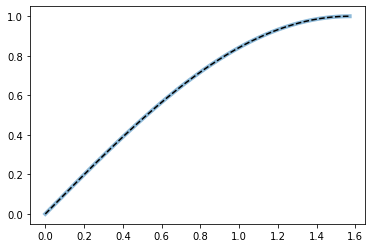

In [5]:
%time kinc = ellipeinc(phi, 1.0)
plt.plot(phi, kinc, linewidth=4, alpha=0.5)
%time fburl = e(phi, 1.0)
plt.plot(phi, fburl, 'k--')

In [ ]:
%time einc = ellipeinc(phi, m)
plt.plot(phi, einc, linewidth=4, alpha=0.5)
%time eburl = e(phi, m)
plt.plot(phi, eburl, 'k--')

In [ ]:
%timeit einc = ellipeinc(phi, m)
%timeit eburl = e(phi, m)

In [ ]:
%time pburl = p(0.25, -1.7777777777777777, 1.0000000000000004)
plt.plot(phi, pburl, 'k--')

In [ ]:
%timeit pburl = p(phi, -n, m)

In [ ]:
p(0.25, -1.7777777777777777, 1.000000000)

In [ ]:
-1.7777777777777777 - 1.0000000000000004

In [1]:
1 / 9

0.1111111111111111

In [5]:
s = np.random.rand(1)
cs = np.cos(s)
ss = np.sin(s)

In [7]:
%timeit np.tan(s)

598 ns ± 15.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [8]:
%timeit cs / ss

622 ns ± 11.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
